In [1]:
import numpy as np
import pandas as pd

![Pandas Plotting](img/plt.png)

# Daten für später einlesen und säubern

In [2]:
df = pd.read_csv("./data/pokedex.csv")
df.index = df['Unnamed: 0']
df.index.name = 'Index'
df = df.drop(columns=['Unnamed: 0'])
df = df.astype({'status': 'category', 'species': 'category', 'type_1': 'category', 'type_2': 'category'})
pd.set_option('display.max_columns', df.shape[1])

# Einführung Matplotlib

[Matplotlib](https://matplotlib.org/) ist die Standard-Bibliothek im Python Science Stack zum Plotten von Grafiken und damit der Visualisierung unserer Daten. Matplotlib ist damit aber auch eine Säule im Gro der Grafikbibliotheken für die Datenvisualisierung neben [ggplot](https://ggplot2.tidyverse.org/reference/ggplot.html) (R) und [D3](https://d3js.org/) (JavaScript).

Matplotlib ist in mehrere Submodule unterteilt, von denen für uns **pyplot** das wichtigste ist. Matplotlib beruht wie viele andere Module im Python Science Stack auf auf NumPy.

Standardmäßig importieren wir `pyplot` folgendermaßen:

In [13]:
import matplotlib.pyplot as plt

Nun können wir über `plt` auf die Plottingfunktionen zugreifen.

Historisch gibt es aber zwei "Stile", wie man Matplotlib verwenden kann. Dies liegt an der ursprünglichen Intention, die der Etwickler John Hunter 2002 hatte, als er Matplotlib schuf. Er wollte, wie er es von dem Programm [MATLAB](https://de.wikipedia.org/wiki/Matlab) gewohnt war, über IPython auf die Bibliothek [Gnuplot](https://de.wikipedia.org/wiki/Gnuplot) zugreifen, um seine Grafiken zu generieren. Der ursprüngliche Stil ist also an die Syntax von MATLAB und die Verwendungsweise von Gnuplot angelegt. Der Stil ist sehr einfach und ermöglicht es, schnell Plots zu erstellen. Zwar gibt es allerlei Anpassungsmöglichkeiten, aber die Matplotlibgemeinschaft profesioneller Entwickler:innen wollte ein Verfahren zum Erstellen von Plots, das sich an den [Objektorientierten](https://de.wikipedia.org/wiki/Objektorientierung) Stil anlehnte, die sie von ihrer professionellen Arbeit her gewohnt waren. Ausserdem spiegelt dieser Stil stärker die Interna von Matplotlib wider und lässt sehr tief in die Gestaltung der Plots auch in der Verwendung mit anderen Modulen eingreifen.

Man muss aber feststellen, dass die Art und Weise, wie Grafiken in Matplotlib erstellt werden, nicht mehr "State-of-the-art" ist. Nicht nur ist der Stil oft sehr "imperativ" statt "deklarativ" sondern oft auch unnötig umständlich und kompliziert, so dass es gerade Nicht-Programmierer:innen schwer fällt. Matplotlib kennt auch nicht die heute unter Grafikern geschätzte sog. [Grammar of Graphics](https://towardsdatascience.com/a-comprehensive-guide-to-the-grammar-of-graphics-for-effective-visualization-of-multi-dimensional-1f92b4ed4149). Auch fehlt jegliche Möglichkeit der Interaktivität, wie man sie heute bei der Entwicklung moderner Dashboards braucht. Die Bibliotheken, die von dieser Komplexität abstrahieren, wie z.B. [Seaborn](https://seaborn.pydata.org/), sind natürlich vorhanden und sollen hier auch Erwähnung finden. Dennoch kommt eine Einführung in den Python Science Stack nicht um Matplotlib herum, denn es ist nach wie vor allgegenwärtig.

Ganz andere Ansätze in der Python-Welt wären Bibliotheken, die in JavaScript Code übersetzen und zum Beispiel wie [Altair](https://altair-viz.github.io/) auf [Vega-Lite](http://vega.github.io/vega-lite/) aufsetzen, das wiederum nach D3.js kompiliert. In dieser Einführung ist leider nicht der Platz, auf solche Möglichkeiten einzugehen. Ein Blick lohnt sich aber allemal, da ich glaube, das solchen Paketen die Zukunft gehört.

## Grundsätzliches

Egal, welchen Stil man verwendet. Ein Plot mit Matplotlib erfolgt immer in mindestens drei Schritten:

1. Erstelle ein `figure` Element, das eine oder mehrere Achsenelemente enthält.
2. Fülle die Achsen.
3. Übergib den Plot mit `plt.show()` an eine Anzeige Einheit oder speichere als Bilddatei mit `plt.figsave()`.

Um in Jupyter die Plots besser anzeigen zu lassen, setzen wir die Anzeige auf `inline`.

In [53]:
%matplotlib inline

Wir können auch noch für das Jupyter Notebook die generelle Größe der Inline-Plots anpassen.

In [60]:
plt.rcParams["figure.figsize"] = (8, 4)

Über das Subsubmodul `style` aus dem `pyplot` Submodul lassen sich für alle Plots bestimmte vorgefertigte Stile, bzw. Themes definieren. Eine Referenz aller Stile findet man [hier](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

In [41]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [47]:
plt.style.use('seaborn-darkgrid')

## MATLAB Stil

Der MATLAB Stil wird direkt über die Funktionen im Modul `pyplot` gesteuert. Dabei übergibt man einen NumPy Array an eine Plottingfunktion; je nachdem, welche Daten man hat, an eine andere. Bei kontinuierlichen Daten ruft man normalerweise die `.plot()` Methode auf.

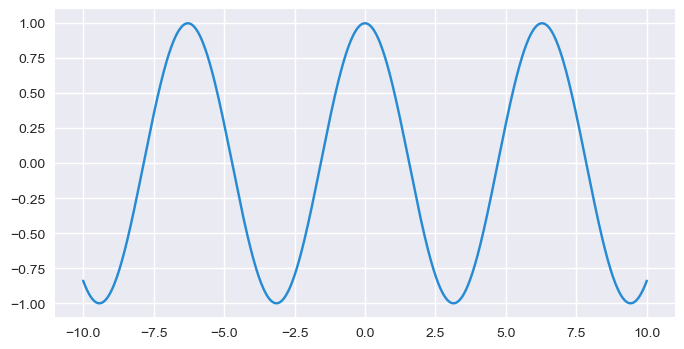

In [61]:
x_axis = np.linspace(-10, 10, 1000)
y_axis = np.cos(x_axis)

plt.plot(x_axis, y_axis)
plt.show()

Beim MATLAB Stil kann man weitere Einstellungen oder das Hinzufügen von Elementen über die Funktionen von `pyplot` direkt vornehmen.

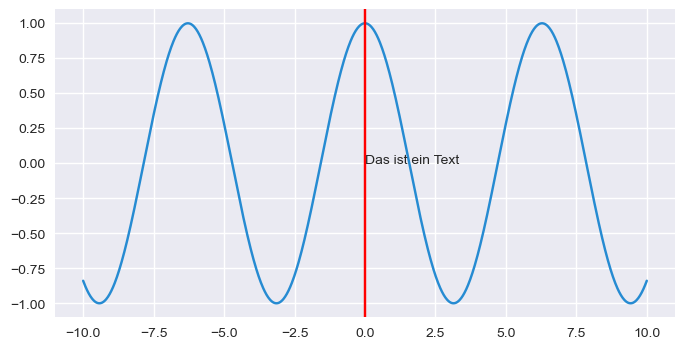

In [62]:
plt.plot(x_axis, y_axis)
plt.axvline(0, color='red')
plt.text(0, 0, "Das ist ein Text")
plt.show()

## Objektorientierter Stil

Wie oben beschrieben, wird bei der Generierung einer Grafik mit Matplotlib zuerst ein `figure` Objekt erstellt, dem ein oder mehrere `axes` Objekte zugeordnet werden. Dieser Schritt wurde beim MATLAB Stil von den Funktion `plt` implizit übernommen. Beim *objektorientierten Stil* nun, möchte man diese Objekte in Variablen speichern und über diese dann direkt auf das `axes` Objekt zugreifen, um dann die Plots zu generieren. Um diese `figure` und `axes` Objekte "in einem Rutsch" zu generieren, bedienen wir uns der Hilfsfunktion `plt.subplots()`, die ein Tupel an `figure` und `axes` Objekten zurückgibt. Durch Python [Destructuring](https://blog.teclado.com/destructuring-in-python/) können wir die Teile dieses Tupels in Variablen speichern. Sinnvollerweise benennt man diese beiden konventionell `fig` und `ax` bzw. `axs` bei mehreren Achsen.

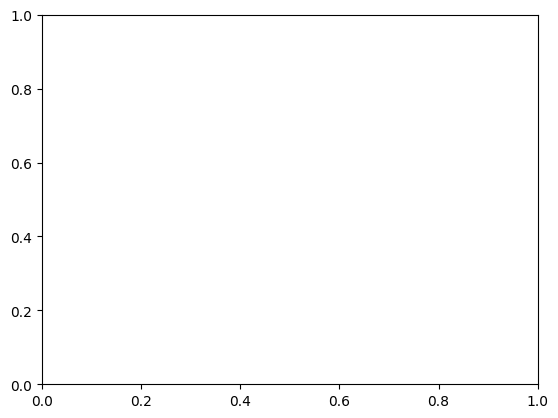

In [26]:
fig, ax = plt.subplots()
plt.show()

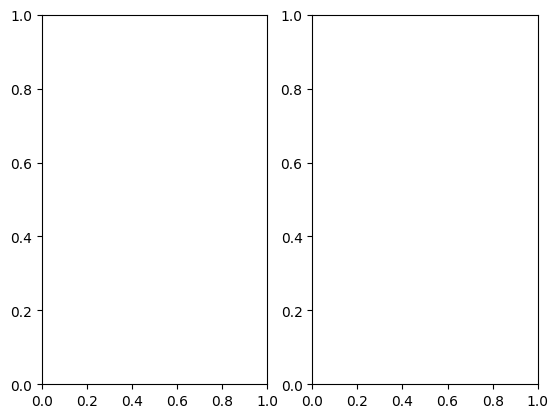

In [29]:
fig, axs = plt.subplots(1, 2)
plt.show()

In [30]:
print(axs[0])


AxesSubplot(0.125,0.11;0.352273x0.77)


Wie Sie sehen gibt `ax` ein leeres Achsenelement zurück. Mehre Elemente bekommen wir, wenn wir an `plt.subplots` eine Tupel als "Shape" mitgeben:

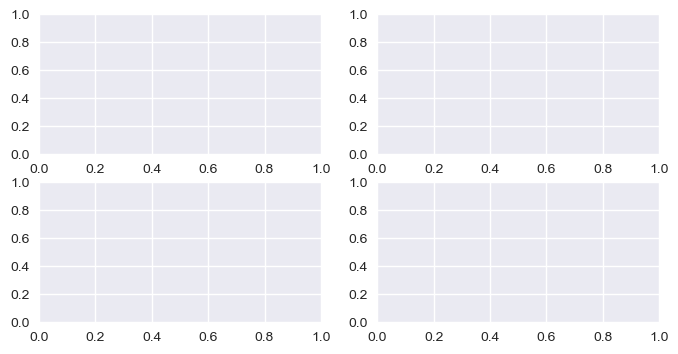

In [90]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.show()

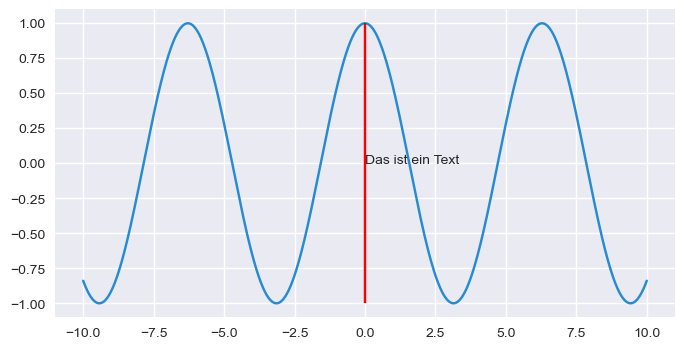

In [64]:
fig, ax = plt.subplots()
ax.plot(x_axis, y_axis)
ax.vlines(0, ymin=np.min(y_axis), ymax=np.max(y_axis), color='red')
ax.text(0, 0, 'Das ist ein Text')
plt.show()

Noch sieht die Funktionsweise der Stile sehr ähnlich aus. Aber wenn wir auf die Manipulation oder das Hinzufügen komplexerer Elemente in Matplotlib zu sprechen kommen, so ist die Handhabung im objektorientierten Stil wesentlich einfacher. Dieser Stil wird auch von den Matplotlib Machern selbst empfohlen, was auch die Beispiele und Tutorials in der offiziellen Dokumentation widerspiegeln.

## Aufbau eines Plots

Jedes Matplotlib-Objekt können Sie sich vorstellen wie eine Leinwand. Die Leinwand selbst, also Größe und Seitenverhältnisse sind das sog. `plt.figure`-Objekt. Dieses wiederum kann in ein oder mehrere Bereiche (Subplots - ähnlich einer zweidimensionalen Matrix) eingeteilt werden. Diese Bereiche bestehen dann aus sog. `plt.axes`-Objekten. Ein `axes`-Objekt selbst wieder zerfällt in mehrere Elemente: da wäre der eigentliche Plot, die Striche (ticks) der Achsenbeschriftung, die Label der einzelnen Ticks, ein Titel für jede Achse, eine Titel für den Subplot und eine Legende. Auch Textelemente können sich frei in einem `axes`-Objekt befinden.

Folgende Grafik mag dies veranschaulichen:

![Matplotlib Aufbau](./img/matplotlib_figure.png)

Um die oben erwähnten `figure` und `axes` Objekte "in einem Rutsch" zu generieren, bedienen wir uns der Hilfsfunktion `plt.subplots()`, die ein Tupel an `figure` und `axes` Objekten zurückgibt. Durch Python [Destructuring](https://blog.teclado.com/destructuring-in-python/) können wir die Teile dieses Tupels in Variablen speichern. Sinnvollerweise benennt man diese beiden konventionell `fig` und `ax` bzw. `axs` bei mehreren Achsen. Der Methode `plt.subplots()` selbst können wir einen Werte für Zeilen und Spalten übergeben, in die wir die Subplots unterteilen wollen.

# Verschiedene Plot Typen

Wollen wir uns also zuerst einen Überblick über die wichtigsten Plot Typen geben, die Matplotlib mitliefert. Mehr Typen finden sich in der Dokumentation, vor allem in der [Beispiel Sektion](https://matplotlib.org/stable/gallery/index.html), aus der ich selbst wertvolle Anregungen geschöpft habe. Nennenswert ist auch noch die [Python-Graph-Gallery](https://www.python-graph-gallery.com/), in der man viele nützliche Anregungen findet.

## plt.plot

Dieser Typ ist für kontinuierliche Daten und wir haben die Grundfunktion oben schon kennengelernt. Aufgerufen wird der Plot über `.plot()`.

Man hat aber immer die Möglichkeit, indem man `.plot` öfters auf einem Achsenelement aufruft, mehrer Plots zu überlagern.

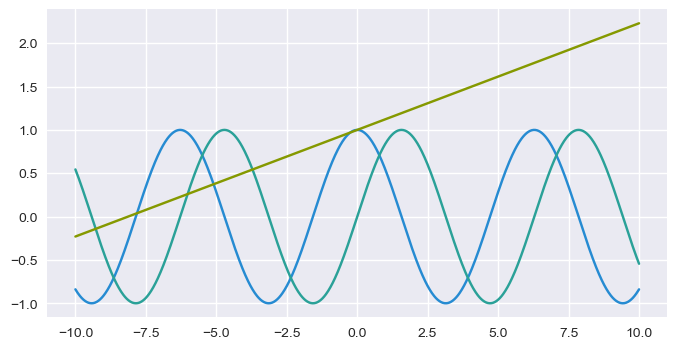

In [65]:
y_axis_sin = np.sin(x_axis)
y_axis_line = np.array([x * 0.123 + 1 for x in x_axis])

fig, ax = plt.subplots()

ax.plot(x_axis, y_axis)
ax.plot(x_axis, y_axis_sin)
ax.plot(x_axis, y_axis_line)

plt.show()

## plt.scatter

Ein Scatterplot dient der Darstellung des Zusammenhangs zweier numerischer Variablen, die jeweils auf der X- und auf der Y-Achse abgetragen werden. Der Plot wird mit der Funktion `.scatter()` aufgerufen.

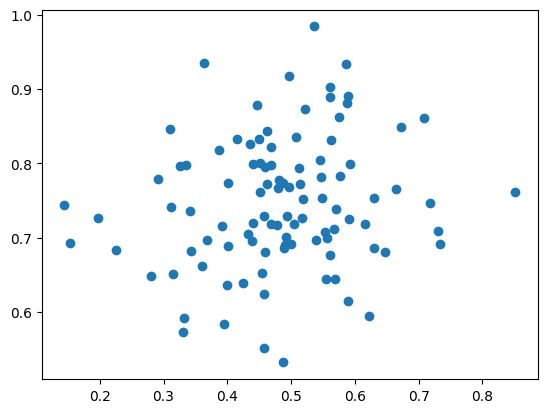

In [5]:
from numpy.random import default_rng
rng = default_rng(521)

x_axis = rng.normal(0.5, 0.12, size=100)
y_axis = rng.normal(0.75, 0.09, size=100)

_, ax = plt.subplots()
ax.scatter(x_axis, y_axis)
plt.show()

## plt.hist / plt.bar

Über die ein Histogram, bzw. einen Barplot lassen sich die Häufigkeiten von Variablen darstellen.

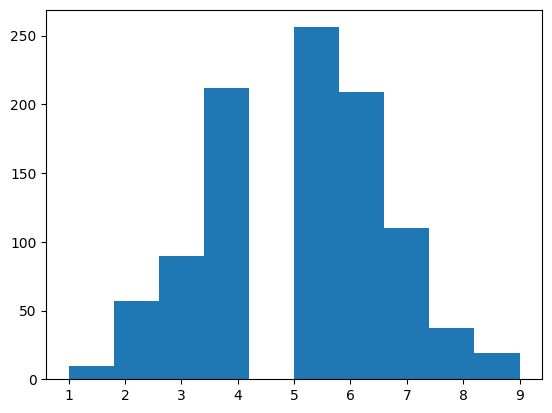

In [6]:
coin = [0, 1]

throws = []
for _ in range(1000):
    throws.append(sum(rng.choice(coin, size=10, replace=True)))

_, ax = plt.subplots()
ax.hist(throws)
plt.show()

## Boxplot

-- Beschreibung --

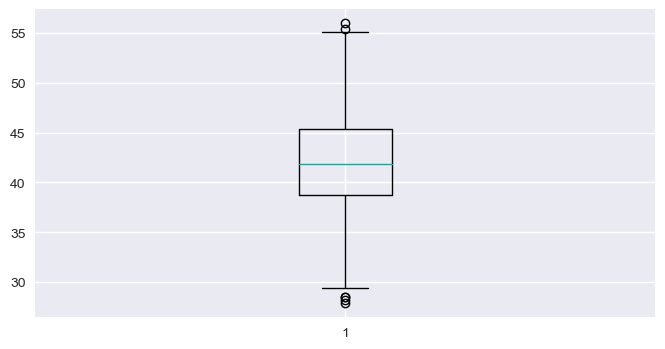

In [89]:
rand = rng.normal(42, 5, 1000)

_, ax = plt.subplots()
ax.boxplot(rand)
plt.show()

In [33]:
df['against_bug'].head(20)

Index
0     1.00
1     1.00
2     1.00
3     1.00
4     0.50
5     0.50
6     0.25
7     0.50
8     0.25
9     1.00
10    1.00
11    1.00
12    1.00
13    1.00
14    1.00
15    0.50
16    0.50
17    0.50
18    0.50
19    0.50
Name: against_bug, dtype: float64

# Einen Sampleplot erstellen

Gibt es im Spiel Pokemon ein Element, das alle anderen überragt, das am meisten Vorteile gegenüber anderen Elemente bietet, oder das generell mehr Angriffs- und Verteidigungswerte aufweist? Oder ist es das, das in den Simulationen einfach am häufigsten gewonnen hat? Diese Fragen betreffen das **Balancing** des Spiels: ist das Spiel ausgeglichen oder erhöht die Wahl des Pokemons eines bestimmten Elements alleine schon die Gewinnchance?

Beginnen wir mit der Frage: "Gibt es ein Element, das weniger Nachteile gegenüber den anderen Elementen hat als andere?" Was müssen wir tun, um diese Frage zu beantworten? Wir könnten eine Matrix erstellen das für jedes Element den durchschnittlichen Nachteil gegenüber anderen Elementen angibt. In unserem Datensatz befindet sich für jedes Pokemon der Nachteil als *Multiplikationsfaktor* in den Spalten `against_…`.

Das Pokemon "Bisasam" vom Elementtyp "Grass" hat z.B. einen Nachteil von 2 gegenüber Feuer Elementen (muss also doppelten Schaden einstecken), aber nur einen Nachteil von 0.5 gegenüber Wasser Elementen (halbiert also deren Schaden).

Dazu wollen wir je Element je `against_…` Spalte die Mittelwerte berechnen und eine Matrix formen. Der Einfachheit halber soll unsere Matrix eine Python Liste sein, in der jedes Element wiederum eine Liste an Mittelwerten ist. Im Grunde soll folgende Matrix entstehen:

![Beispiel Matrix](img/matrix_example.png)

Wir brauchen somit zwei, ineinander verschachtelte Schleifen. Die äußere Schleife iteriert über die einzelnen Elemente, die innere Schleife über die `against_…` Spalten. So soll unser Code dann aussehen:

```
# erstelle eine Liste <elements>, die alle Element-Typen enthält

# erstelle eine Liste <against_columns> die alle Name der against_-Spalten enthält

# lege eine leere Liste an (unsere spätere Matrix)

for element in elements:

    # lege eine leere Liste an (unsere spätere Zeile)
    
    # filtere auf element

    for column in against_columns:
    
        # berechne den Mittelwert von column
        
        # füge den Mittelwert der Zeile hinzu
        
    # füge die Zeile der Matrix hinzu
    
# erstelle aus der Matrix einen Panda DataFrame mit <elements> als Index und <against_columns> als Spaltennamen
```

Dazu brauchen wir zuallererst die Listen der Element und der Spaltennamen. Der Elementtyp eines Pokemons steckt in der Variablen `type_1` (wir ignorieren einmal, dass manche Pokemon auch einen sekundären Typ `type_2` haben können). Da es sich bei dieser Variable um einen Pandas Datentyp "categorical" handelt, können wir auf die einzigartigen Katigorien per `.dtype` Attribut und darin das Subattribut `.categories` zugreifen.

In [3]:
df['type_1'].dtype.categories

Index(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'],
      dtype='object')

Da es sich bei dem Rückgabewert um ein Pandas Series Objekt handelt, können wir die Methode `.to_list()` aufrufen und das ganze direkt in einer Liste speichern.

In [4]:
elements = df['type_1'].dtype.categories.to_list()

Ähnlich können wir mit den `against_…` Spalten verfahren. Wir können zuerst den DataFrame auf die Spalten filtern und das Attribut `.columns` aufrufen. Wieder wandeln wir das ganze mit `.to_list()` in eine Liste um.

In [5]:
df.filter(like='against_').columns.to_list()

['against_normal',
 'against_fire',
 'against_water',
 'against_electric',
 'against_grass',
 'against_ice',
 'against_fight',
 'against_poison',
 'against_ground',
 'against_flying',
 'against_psychic',
 'against_bug',
 'against_rock',
 'against_ghost',
 'against_dragon',
 'against_dark',
 'against_steel',
 'against_fairy']

Allerdings wollen wir die Namen der Spalten genauso sortiert haben, wie die Liste an Elementen. Hierfür können wir die Python Standardfunktion `sorted()` benutzen, welche eine Liste alphabetisch oder numerisch sortiert.

In [6]:
against_columns = sorted(df.filter(like='against_').columns.to_list())

Um den Code übersichtlicher und eventull wiederverwendbar zu machen, schreiben wir unsere eigene kleine Funktion `get_avg_against()`, die folgende Parameter entgegen nimmt:
- einen Elementtyp als String
- einen Spaltennamen als String
- einen Dataframe, aus dem der Mittelwert berechnet werden soll.

Als Rückgabewert soll folgendes ausgegeben werden: 

```
round( df[ df['type_1'] == <element> ][<against_spalte>].mean(), 2)
```

Ausgesprochen: "Filtere die Zeilen heraus, deren type_1 gleich dem Element ist. Wähle die übergebene Against-Spalte und berechne davon den Mittelwert. Gib diesen Mittelwert *gerundet* auf *zwei* Stellen zurück."

In [7]:
def get_avg_against(element_str, against_str, dataframe):
    mask = dataframe['type_1'] == element_str
    avg = dataframe[mask][against_str].mean()
    return round(avg, 2)

So können wir nun unseren Code vervollständigen und uns eine Matrix an Mittlwerten ausgeben lassen.

In [8]:
matrix = [] # eine leere Liste erstellen

for element in elements:
    line = [] # eine leere Liste für eine Zeile in der Matrix erstellen
    
    for column in against_columns:
        # mit der Methode '.append()' können wir Werte an das Ende einer Liste hinzufügen
        line.append(get_avg_against(element, column, df))
        
    # wenn wir einmal durch die Spalten hindurch sind, fügen wir die Zeile an das Ende der Matrix
    matrix.append(line)
    
# wir generieren einen Pandas DataFrame aus der Matrix
avg_against_df = pd.DataFrame(matrix, index=elements, columns=against_columns)

In [10]:
avg_against_df

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
Bug,0.83,1.00,0.92,1.11,0.91,0.46,2.22,2.07,1.04,0.42,0.55,1.19,0.93,0.90,1.13,2.23,0.95,1.02
Dark,1.74,0.52,1.00,1.08,2.15,2.07,1.02,1.04,0.49,0.83,0.95,1.16,0.93,1.02,0.00,1.20,1.05,1.01
Dragon,0.94,1.13,1.95,0.47,2.07,0.87,0.53,1.04,1.17,0.51,0.80,2.49,0.93,0.90,1.00,1.11,1.07,0.60
Electric,0.91,0.98,0.97,0.44,1.00,1.06,1.09,0.49,0.97,0.88,1.77,1.08,0.95,0.95,0.98,1.11,0.51,0.95
Fairy,0.47,0.50,0.00,1.09,0.98,0.50,1.05,0.98,1.00,0.93,0.95,1.07,0.98,1.91,0.98,1.07,1.95,1.00
Fighting,0.52,0.54,0.96,1.07,2.02,1.06,1.06,1.93,1.07,0.96,1.02,0.96,0.94,0.92,1.76,0.52,0.98,0.99
Fire,0.46,1.00,1.02,1.06,0.57,0.96,0.44,1.12,1.02,0.49,1.81,0.58,0.95,0.94,1.07,2.11,0.50,2.05
Flying,0.47,1.00,1.19,2.00,1.19,0.56,0.94,0.94,1.00,0.47,0.00,2.25,0.94,0.88,0.94,1.88,0.88,0.81
Ghost,0.58,1.95,1.02,0.87,0.99,0.00,1.17,1.26,1.98,0.77,0.77,1.39,0.00,0.61,1.07,1.12,0.99,0.96
Grass,1.74,0.97,0.98,0.52,1.02,0.93,2.07,2.03,1.02,0.41,0.55,2.21,0.97,1.86,1.14,1.07,1.07,0.49


Erstaunlich ist an dieser Übersicht, dass es nicht von vornherein ausgemacht ist, dass wenn gleiche Elemente aufeinander treffen, sich der Nachteil ausbalanciert, also 1 sein müsste. So haben z.B. Drachen einen enormen Nachteil gegenüber anderen Drachen, nämlich durchschnittlich 1.95.

Wie die Elemente gegen sich selbst abschneiden, kann man leicht anhand der Diagonalen dieser Matrix sehen. Doch lässt sich diese auch "programmatisch" ausgeben? Ja! Das Modul NumPy hat eine solche Funktion. Wir müssen als den DataFrame per `.to_numpy` in einen NumPy Array umwandeln und können auf diesen dann die Methode `.diagonal()` anwenden, welche uns die Werte der Matrix-Diagonal zurückgibt.

In [11]:
avg_against_df.to_numpy().diagonal()

array([ 0.83,  0.52,  1.95,  0.44,  0.98,  1.06,  0.44,  0.94,  1.98,
        0.41,  1.02, 10.64,  1.  ,  0.49,  0.52,  1.11,  0.6 ,  0.51])

**Aber** haben wir wirklich nichts übersehen? Nichts, was uns beim Überfliegen der Zahlen entgangen wäre? Manchmal ist unser Auge besser darin geschult über Visualisierungen durch Farben und Formen Muster oder Auffälligkeiten zu finden. Wir wollen daher unsere Matrix als sog. [Heatmap](https://de.wikipedia.org/wiki/Heatmap) visualisieren und uns visuell vergewissern.

## Visualisierung mit einer Heatmap

Unsere Heatmap wird nun folgendermaßen generiert und aussehen:

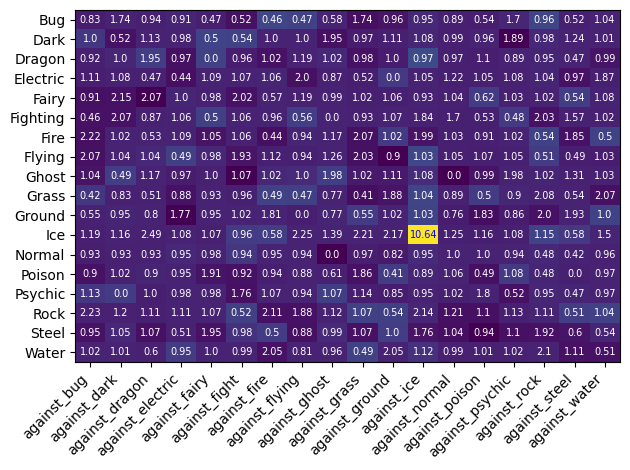

In [14]:
np_matrix = avg_against_df.to_numpy()

fig, ax = plt.subplots()

ax.imshow(np_matrix, aspect='auto')

ax.set_xticks(np.arange(len(against_columns)), labels=against_columns)
ax.set_yticks(np.arange(len(elements)), labels=elements)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

for i in range(len(elements)):
    for j in range(len(against_columns)):
        val = np_matrix[i, j]
        if val < 5:
            coloring = 'w'
        else:
            coloring = 'b'
        ax.text(i, j, val, color=coloring, ha='center', va='center', fontsize=7)
        
fig.tight_layout()
plt.show()

**Erschrecken Sie nicht!** Wir werden alles Stück für Stück durchgehen und verständlich machen!

### Heatmap - plt.imshow()

Mit welchem Plottyp können wir nun unsere Heatmap generieren? Hierfür hält Pyplot die Funktion `.imshow()` bereit. Dieser Methode kann man einen NumPy Array aus numerischen Werten übergeben. Aus dem Min- und dem Max-Wert dieses Arrays "baut" die Funktion im Hintergrund eine kontinuierliche Farbskala (min = dunkle Werte / max = helle Werte). Jeder Wert im Array wird dann mit entsprechenden Wert auf der Farbskala "eingefärbt".

[[89 34 97 92 38 24 76]
 [83 63 81 92 80 34 31]
 [ 3 70 21  5 55 71 80]
 [16 65 47 65 38 85 81]
 [ 2 16 22 87  9 57 18]
 [ 5  6 31 43 64 11 61]
 [52 98  2 25 17 23 15]]


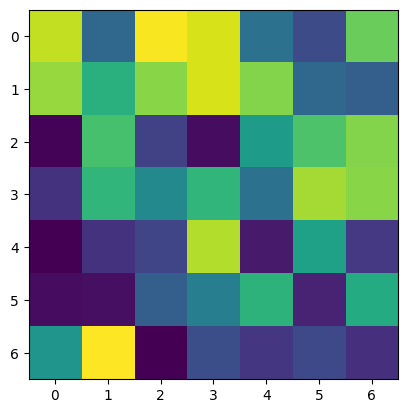

In [15]:
random_nums = np.random.randint(0, 100, size=49).reshape(7, 7)

print(random_nums)

fig, ax = plt.subplots()

ax.imshow(random_nums)
plt.show()

#### Exkurs: mit plt.imshow() Pixelbilder anzeigen lassen

Bilder werden in der Informationstechnologie meistens als einzelne Pixel gespeichert, denen drei Werte zwischen 0 und 255 für Rot, Grün und Blau zugeordnet werden. Je nachdem, wie kräftig ein Wert ist und wie sich diese pro Pixel "mischen", bzw. "überlappen", wird ein Farbton pro Pixel generiert. Dieses Verfahren kann man sich auch als dreidimensionalen Tensor vorstellen, dessen einzelne Schichten Rot, Grün und Blau sind. Die Anzahl der Zeilen ist die Höhe des Bildes in Pixel, die Anzahl der Spalten ist die Breite des Bildes in Pixel.

![Pixel_RGB_Tensor](img/rgb_array.png)

In [17]:
with open("img/img_array.npy", "rb") as f:
    img_array = np.load(f)

img_array.shape

(427, 640, 3)

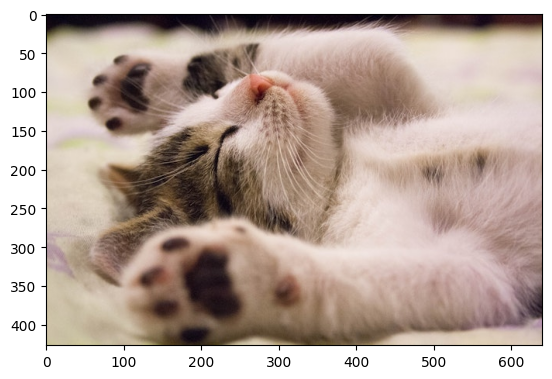

In [18]:
plt.imshow(img_array)
plt.show()

**------ weiter -------------------------------------------**

Um das obige Beispiel auch bei unserer Matrix anzuwenden, müssen wir diese erst in einen NumPy Array umwandeln. Wie wir dies machen, haben wir weiter oben schon gesehen: wir rufen einfach die Methode `.to_numpy()` auf.

In [19]:
np_matrix = avg_against_df.to_numpy()

Dann können wir diesen Array an `plt.imshow()` übergeben.

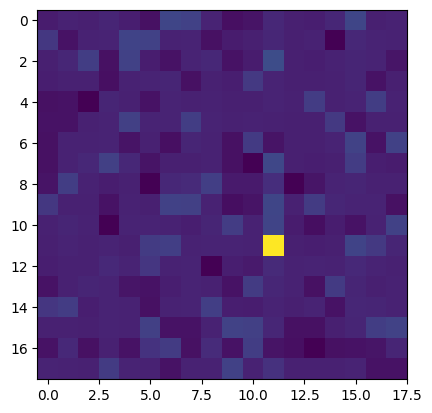

In [20]:
fig, ax = plt.subplots()

ax.imshow(np_matrix)
plt.show()

Schon hier sehen wir den hell leuchtenden Punkt, der uns darauf hinweist, dass wir es hier mit einem Ausreißer zu tun haben. Alle anderen Farben sehen sehr ebenmäẞig aus und deuten auf ein ausbalanciertes Design hin.

Wo aber genau liegt nun dieser Ausreiẞer? Um welches Element handelt es sich? Wir sollten die Namen der Elemente und der Spalten als Achsenbeschriftungen (*ticklabels*) hinzufügen. Dies können wir mit den beiden Achsen Methoden `.set_xticks()` respektive `.set_yticks()` machen. Dabei müssen wir ihnen eine Liste, oder einen Array an Werten übergeben, wo welche Ticks auf der Achse erscheinen sollen und können darüber noch über den Parameter "labels" eine Liste an Namen für die Ticks vergeben.

Wie bekommen wir nun am schnellsten, und vor allem am genauesten die Liste/ den Array an Werten für X- und Y-Achse?

Die Funktion `len()` gibt ja bekanntermaẞen die Anzahl an Elementen in einer Sequenz, also einem Python Iterable wider. Die NumPy Funktion `np.arange(<Zahl>)` wiederum gibt eine Liste von 0 bis "Zahl minus 1" zurück.

Dies können wir nutzen um die Ticks für X- und Y-Achse zu produzieren und ihnen gleichzeitig die Labels mitzugeben.

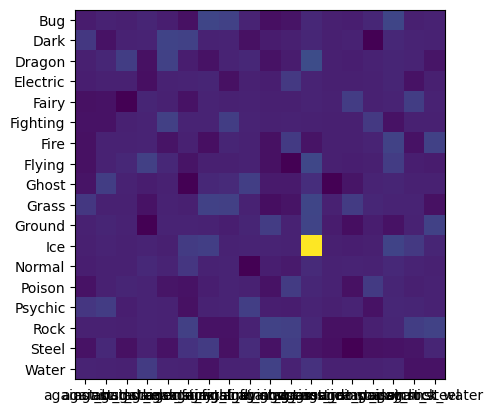

In [21]:
fig, ax = plt.subplots()

ax.imshow(np_matrix)

ax.set_xticks(np.arange(len(against_columns)), labels=against_columns) # neu!
ax.set_yticks(np.arange(len(elements)), labels=elements)               # neu!

plt.show()

Was die Y-Achse betrifft, sieht das schon ganz gut aus, aber das die Labels bei Matplotlib standardmäẞig horizontal orientiert sind, müssen wir sie zuerst "drehen", am besten in einem "schrägen" Winkel von 45 Grad.

Hierzu gibt es mehrere Möglichkeiten. Allerdings hat das Pyplot Modul eine globale Möglichkeit der Konfiguration eines Plots mit Hilfe der Methode `.setp()`. Dieser übergibt man das Objekt, das man verändern möchte, gefolgt von Parametern, *was* verändert werden soll.

Gut, das jedes Achsen-Objekt in Pyplot eine Methode namens `.get_…()` hat, die bestimmte Objekte zurückgibt. Wir brauchen hier die Variante `.get_xticklabels()`, was uns genau das Objekt der Ticklabels der X-Achse zurückgibt, welcher wir dann wieder an `.setp()` übergeben können. Als Parameter stellen wir ein: "rotation" und "ha" (= horizontal alignment).

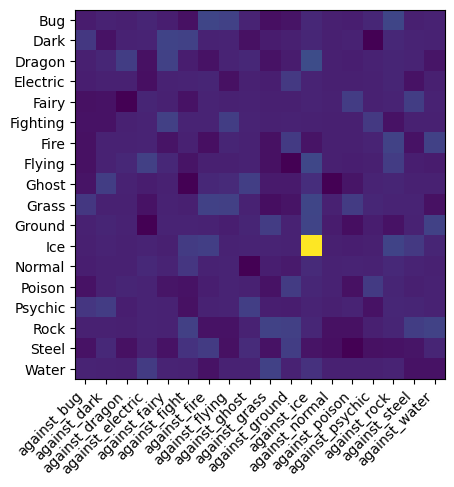

In [22]:
fig, ax = plt.subplots()

ax.imshow(np_matrix)

ax.set_xticks(np.arange(len(against_columns)), labels=against_columns)
ax.set_yticks(np.arange(len(elements)), labels=elements)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # neu!

plt.show()

Dies sieht schon viel leserlicher aus! Und wir sehen endlich, dass es sich beim Ausreiẞer um einen enormen Nachteil handelt, wenn Eis-Elemente auf andere Eis-Elemente treffen. Aber wie hoch ist hier der Mittelwert? Klar, wir könnten oben in der Ausgabe des DataFrames nachsehen, aber besser wäre doch, wir sähen die Werte direkt in unserer Heatmap.

Dazu müssen wir wieder eine kleine zweifache For-Schleife schreiben (ich hoffe, Sie erkennen das Muster bei zweidimensionalen Datenstrukturen!). Wir wollen mit der Methode `ax.text()` in jeder Zelle einen Achsentext setzen. `ax.text()` muss man mindestens die drei Parameter *X-Position*, *Y-Position* und *Wert für den Text* mitgeben. In unserem Fall sind das ja für X- und Y-Position die gleichen Werte, die wir für die Achsen haben. Den Wert für den Text selbst finden wir in der NumPy Matrix.

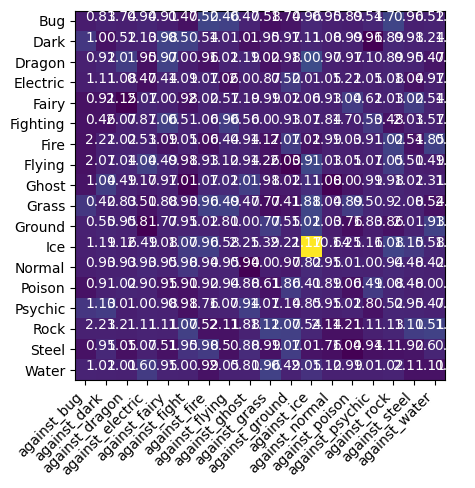

In [23]:
fig, ax = plt.subplots()

ax.imshow(np_matrix)

ax.set_xticks(np.arange(len(against_columns)), labels=against_columns)
ax.set_yticks(np.arange(len(elements)), labels=elements)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

for i in range(len(elements)):             #
    for j in range(len(against_columns)):  #
        val = np_matrix[i, j]              # neu!
        ax.text(i, j, val, color='w')      #

plt.show()

Die Werte stehen nun als Text in den Zellen. Aber ohje, der Text ist viel zu breit und groẞ und passt nicht ganz in die Zellen.

Wir können das Verhältnis der Zellen ändern, indem wir der Funktion `plt.imshow()` einen anderen Wert für den Parameter "aspect" mitgeben. Normalerweise achtet `.imshow()` darauf, dass die Zellen quadratisch sind. Setzen wir aber den Wert auf "auto", so passt sich die Breite der Breite des Textes an.

Ausserdem wollen wir den Text generell etwas kleiner machen und in sowohl horizontal, als auch vertikal in der Zelle zentrieren. Dies können wir erreichen, indem wir in der Funktion `ax.text()` die Parameter "fontsize" (= Schriftgröẞe), "ha" (= horizontal align) und "va" (= vertical align) ändern.

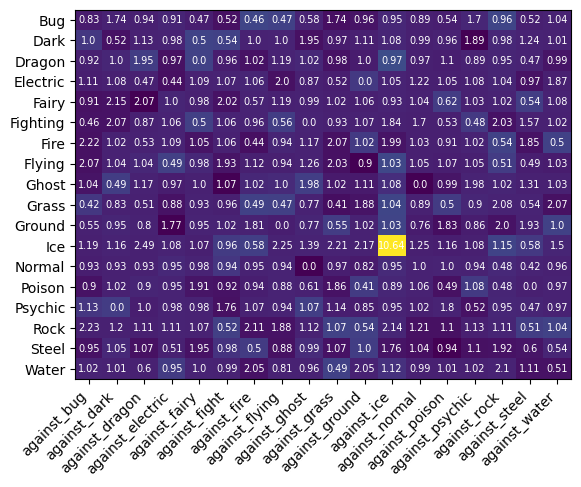

In [24]:
fig, ax = plt.subplots()

ax.imshow(np_matrix, aspect='auto')    # neuer Parameter!

ax.set_xticks(np.arange(len(against_columns)), labels=against_columns)
ax.set_yticks(np.arange(len(elements)), labels=elements)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

for i in range(len(elements)):             
    for j in range(len(against_columns)): 
        val = np_matrix[i, j]              
        ax.text(i, j, val, color='w', ha='center', va='center', fontsize=7)  # neue Parameter!

plt.show()

Der letzte kleine Wermutstropfen ist nun, dass man den Text in unserer "Ausreisser-Zelle" kaum lesen kann, da wir die Textfarbe auf `'w'` also "weiẞ" gestzt haben, man diese aber auf dem hellen Gelb kaum sehen kann. Da die Werte von 0 (= sehr dunkel) bis 10 (= sehr hell) coloriert werden, sollten wir eine Bedingung einbauen: wenn der Wert unter 5 liegt und damit tendenziell dunkel ist, soll als Textfarbe Weiẞ verwendet werden, in allen anderen Fällen aber Blau.

Mit einer If-Anweisung können wir die Bedingung in unseren Code einbauen, dass die Farbe, wenn der Wert unter 5 liegt weiẞ, anderenfalls aber blau sein soll.

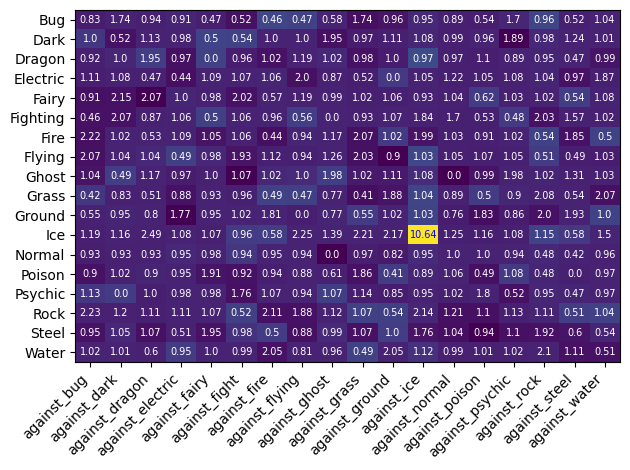

In [25]:
fig, ax = plt.subplots()

ax.imshow(np_matrix, aspect='auto')

ax.set_xticks(np.arange(len(against_columns)), labels=against_columns)
ax.set_yticks(np.arange(len(elements)), labels=elements)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

for i in range(len(elements)):
    for j in range(len(against_columns)):
        
        val = np_matrix[i, j]
        
        if val < 5:              #
            coloring = 'w'       # neuer Code!
        else:                    #
            coloring = 'b'       #
            
        ax.text(i, j, val, color=coloring, ha='center', va='center', fontsize=7) # Parameter geändert!
        
fig.tight_layout()
plt.show()